# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
! wget https://github.com/zineb22-design/master-data/blob/main/cannabis_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-05-23 12:16:51--  https://github.com/zineb22-design/master-data/blob/main/cannabis_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘cannabis_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1’

cannabis_06_bioacti     [ <=>                ] 175.83K  --.-KB/s    in 0.07s   

2025-05-23 12:16:52 (2.32 MB/s) - ‘cannabis_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1’ saved [180047]



In [4]:
df = pd.read_csv('cannabis_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [6]:
# Examine X dimension
X.shape

(1898, 881)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(1898, 154)

In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [10]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 1518, number of used features: 154
[LightGBM] [Info] Start training from score 6.670193
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 1518, number of used features: 154
[LightGBM] [Info] Start training from score 6.670193


In [11]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.95,0.96,0.29,0.06
DecisionTreeRegressor,0.95,0.96,0.29,0.10
ExtraTreesRegressor,0.95,0.96,0.29,4.03
GaussianProcessRegressor,0.95,0.96,0.29,0.96
XGBRegressor,0.94,0.95,0.32,0.31
RandomForestRegressor,0.91,0.92,0.40,2.32
BaggingRegressor,0.90,0.91,0.43,0.28
MLPRegressor,0.89,0.90,0.44,2.48
HistGradientBoostingRegressor,0.85,0.86,0.53,0.92


In [12]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.48,0.69,0.80,2.49
SVR,0.46,0.68,0.81,0.44
LGBMRegressor,0.45,0.67,0.82,0.20
HistGradientBoostingRegressor,0.44,0.67,0.83,0.88
NuSVR,0.43,0.66,0.84,0.31
RandomForestRegressor,0.43,0.66,0.84,3.10
BaggingRegressor,0.41,0.65,0.85,0.26
KNeighborsRegressor,0.41,0.65,0.85,0.05
XGBRegressor,0.39,0.64,0.87,0.27


## **5. Data visualization of model performance**

[(0.0, 1.0)]

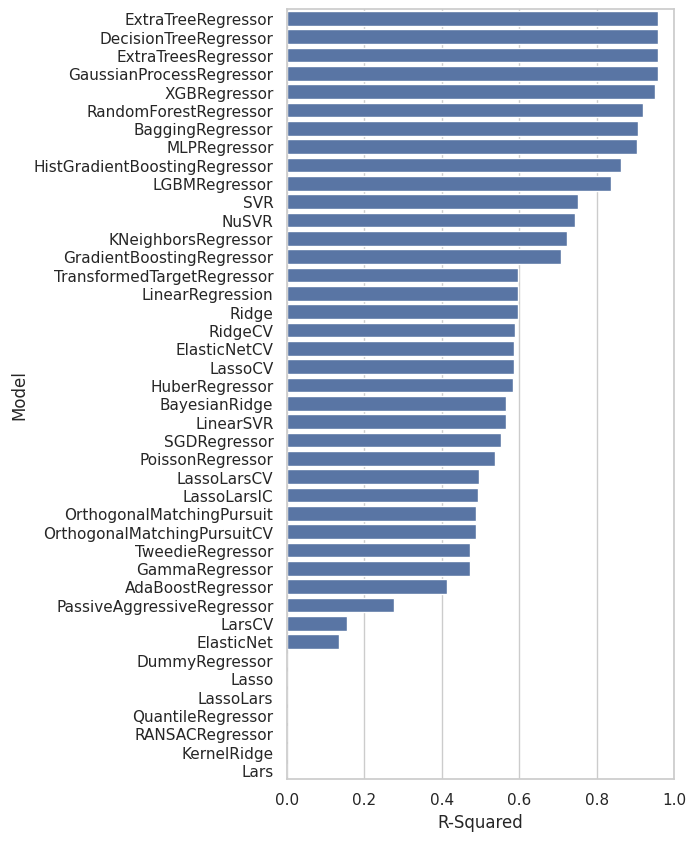

In [13]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

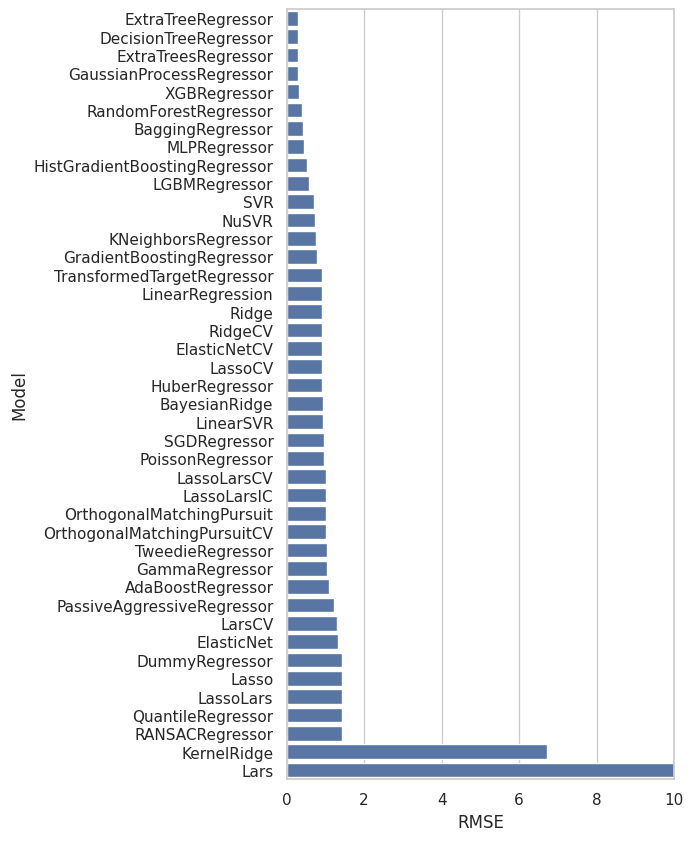

In [14]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

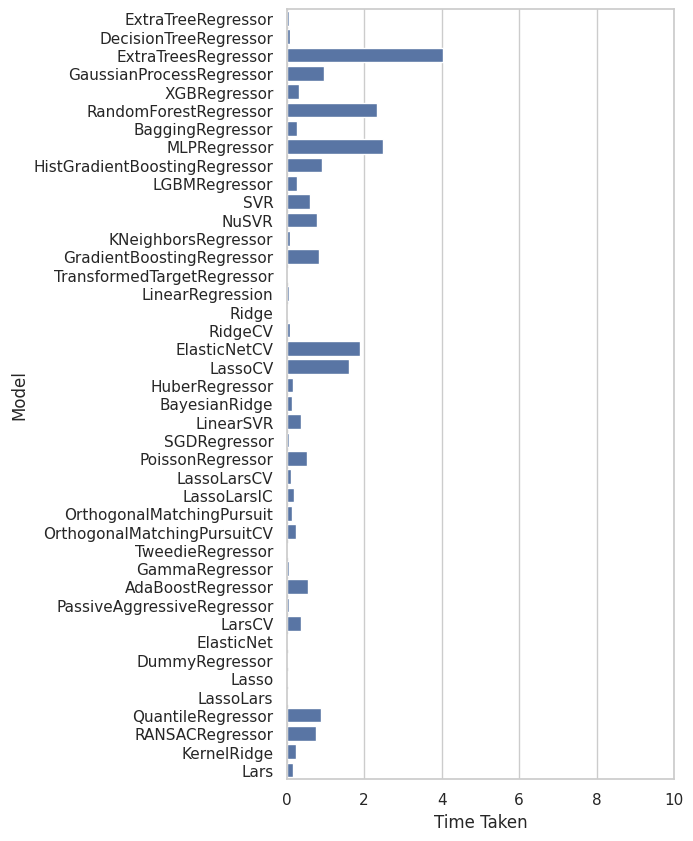

In [15]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [3]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 36.6 MB/s eta 0:00:00


In [10]:
import pandas as pd
from rdkit import Chem

# Charger le fichier CSV (remplace 'ton_fichier.csv' par ton chemin)
df = pd.read_csv('cannabis_05_bioactivity_data_2class_pIC50.csv')

In [11]:
df_canonical = df[['molecule_chembl_id']]

In [13]:
df_canonical.to_csv('exemple_cannabis.txt', index=False)